In [1]:
using PyPlot
using Random

In [19]:
include("model.jl");
include("diagnostics.jl");
include("optimize.jl");
include("plotting.jl");

Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.


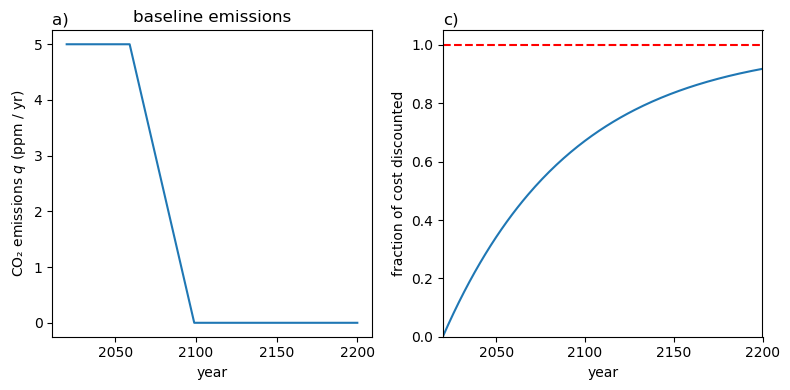

Converged after 201 iterations.


In [22]:
ensemble = Dict{String, ClimateModel}();
first = true
for (member_id, ECS) in enumerate(2.5:0.1:3.5)
    name = "member $member_id";
    t = Array(2020:1.:2200);
    β = 1.
    utility_discount_rate = 0.014
    GWP = 100.
    reduce_cost = 0.05*GWP
    remove_cost = 0.10*GWP
    geoeng_cost = 0.25*GWP
    adapt_cost = 0.25*GWP
    economics = Economics(
        β, utility_discount_rate,
        reduce_cost, remove_cost, geoeng_cost, adapt_cost
    )
    controls = init_linear_controls(t);
    model = ClimateModel(name, ECS, t, controls, economics);
    optimize!(model)
    ensemble[name] = model
    
    if first; plot_setup(model); first=false; end
end

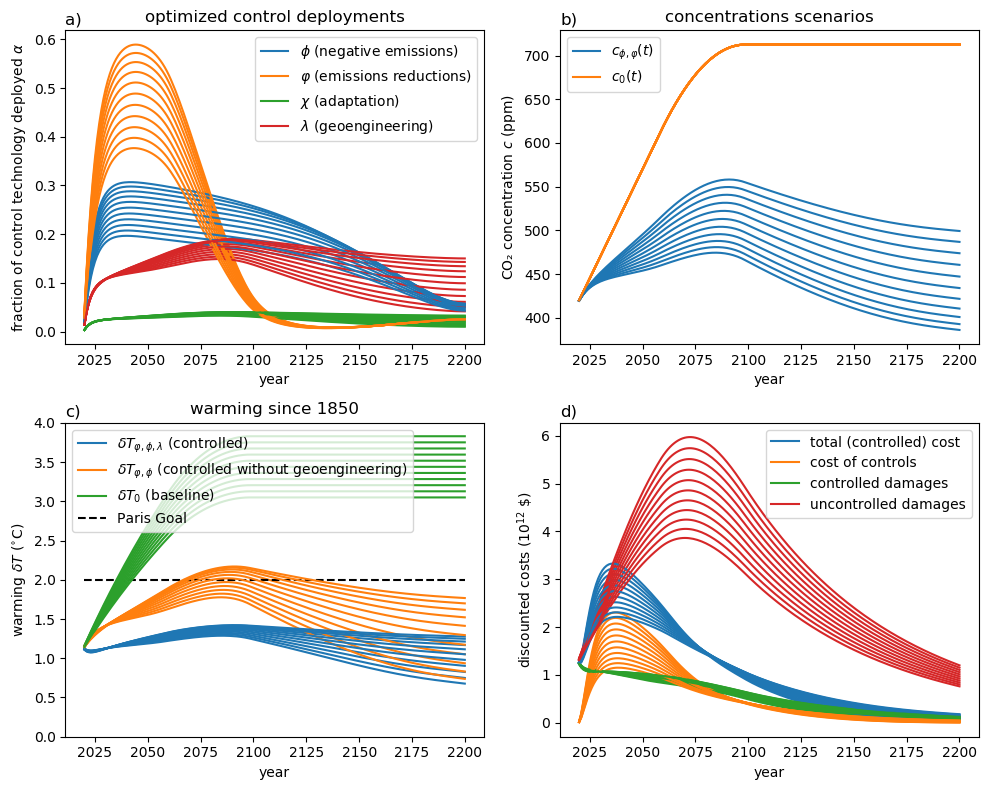

In [23]:
plot_ensemble(ensemble)